# Newspaper SoldOut - Logistic Regression and Imbalanced Data

<b>Overview</b><br>
This notebook is a study of the application of sklearn Logistic Regression model and analysis of metric quality with a focus on how imbalanced data affects the different quality metrics.<br>
The problem presented is the analysis of sales of newspapers of a local stand in order to classify the probability of the newspaper being Sold Out or Not, given a set of features.<br>
The model is applied to dataset Newspaper_SoldOut, which is supplied separately in .csv format.<br><br>
<b>Reports Sections</b><br>
- [Data Import and Exploratory Analysis](#data_import)
- [Model 1 - Logistic Regression with Imbalanced Data](#model_1)
    - [Model Definition](#model_1_def)
    - [Model Fitting and Predictions](#model_1_fit)
    - [Confusion Matrix](#model_1_confMat)
    - [Quality Metrics](#model_1_qa)
- [Model 2 - Logistic Regression with Balanced Data](#model_2)
    - [Data Balancing - Oversampling](#model_2_oversampling)
    - [Model Definition, Fitting and Predictions](#model_2_fit)
    - [Confusion Matrix](#model_2_confMat)
    - [Quality Metrics](#model_2_qa)

<br>
<b>Results Observation</b><br>
During the comparison of model 1 (imbalanced data) and model 2 (balanced data) it was observed that while the models Accuracy varied with an increase in percentage once the data had been balanced (from 87% in model 1 to 89% in model 2), the Area Under Curve (AUC) remained stable at 0.96, demostrating how those two different measures relate to the data and how AUC focus on the model's discriminatory ability between the classes.

In [1]:
# libraries import
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score
from sklearn.utils import resample
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

<a id="data_import"></a>

## Data Import and Exploratory Analysis

In [2]:
df = pd.read_csv('..\Newspaper_SoldOut.csv')

In [3]:
df.head()

,Advert Spend,Price,Prize Value,Wet?,SoldOut
0,1757,60,30,1,0
1,1695,45,30,1,0
2,2359,45,70,0,1
3,1430,65,70,0,0
4,2343,65,80,0,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 371 entries, 0 to 370
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   Advert Spend  371 non-null    int64
 1   Price         371 non-null    int64
 2   Prize Value   371 non-null    int64
 3   Wet?          371 non-null    int64
 4   SoldOut       371 non-null    int64
dtypes: int64(5)
memory usage: 14.6 KB


In [5]:
df.describe()

,Advert Spend,Price,Prize Value,Wet?,SoldOut
count,371.000000,371.000000,371.000000,371.000000,371.000000
mean,1985.665768,54.878706,54.393531,0.215633,0.466307
std,515.754484,6.978643,27.070406,0.411816,0.499537
min,509.000000,45.000000,10.000000,0.000000,0.000000
25%,1635.000000,50.000000,30.000000,0.000000,0.000000
50%,1934.000000,55.000000,60.000000,0.000000,0.000000
75%,2366.500000,60.000000,80.000000,0.000000,1.000000
max,3663.000000,65.000000,100.000000,1.000000,1.000000


array([<AxesSubplot:title={'center':'Advert Spend'}>,
       <AxesSubplot:title={'center':'Price'}>,
       <AxesSubplot:title={'center':'Prize Value'}>], dtype=object)

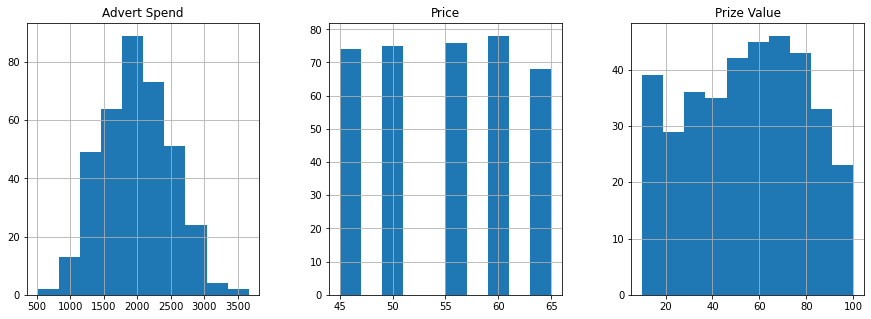

In [6]:
fig, axis = plt.subplots(1,3, figsize=(15,5))
df.drop(columns=['Wet?','SoldOut'], axis=1).hist(ax=axis)

Text(0.5, 1.0, 'Feature "SoldOut" Distribution')

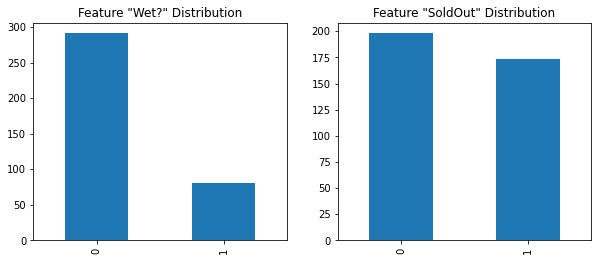

In [7]:
fig, axes = plt.subplots(1, 2, figsize=(10,4))
df['Wet?'].value_counts().plot(ax=axes[0], kind='bar')
axes[0].set_title('Feature "Wet?" Distribution')
df['SoldOut'].value_counts().plot(ax=axes[1], kind='bar')
axes[1].set_title('Feature "SoldOut" Distribution')

It can be observed a imbalanced in the data for the categorical feature "Wet?" and for the target feature "SoldOut", having more examples of False/Negative than True/Positive in both features.<br>
For this type of scenario, my recommendation would be to start with balancing the data using oversampling or undersampling, but for the purposes of this exercise, this will only be performed on the second part of the report with model 2, as I'm hoping to explore the impact of data imbalance in the quality measures Accuracy and AUC. The result expected is for Accuracy to be lower when an imbalance is presented, while AUC presents little to no impact by the imbalanced data, as it has a different focus on evaluating the model.<br>
Based on that, the first model fitted and presented is trained with imbalanced data, while the second model is then trained with data that has been balanced through oversampling of those features.<br>
Further analysis and discussions on Accuracy and AUC can be seen through the report when analysing the results of the different models.

<a id="model_1"></a>
## Model 1 - Logistic Regression with Imbalanced Data

<a id="model_1_def"></a>
### Model Definition

In [8]:
# Define Target, X and y
target_feature = "SoldOut"
X = df.drop(columns=[target_feature])
y = df[target_feature]

In [9]:
# Split the data into training (60%) and test (40%) sets
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.4, random_state=42)

print("Training Set number of rows: ",len(train_X))
print("Test Set number of rows: ",len(test_X))

Training Set number of rows:  222
Test Set number of rows:  149


<a id="model_1_fit"></a>
### Model Fitting and Predictions

In [10]:
# Define model and fit to data
sales_classifier_model = LogisticRegression()
sales_classifier_model.fit(train_X, train_y)

LogisticRegression()

In [11]:
# Predict on test data
sold_out_predictions = sales_classifier_model.predict(test_X)

<a id="model_1_confMat"></a>
### Confusion Matrix

In [12]:
# Calculate the confusion matrix for the predictions
predictions_matrix = confusion_matrix(test_y,sold_out_predictions)

Text(0.5, 257.44, 'Predicted label')

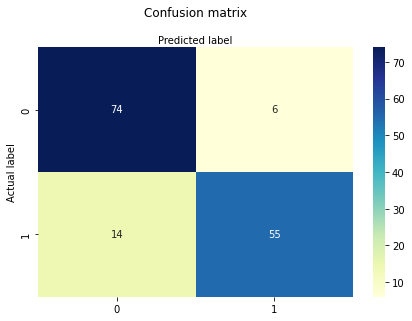

In [13]:
# Visualisation of the confusion matrix
class_names=['Negative','Positive']
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(predictions_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

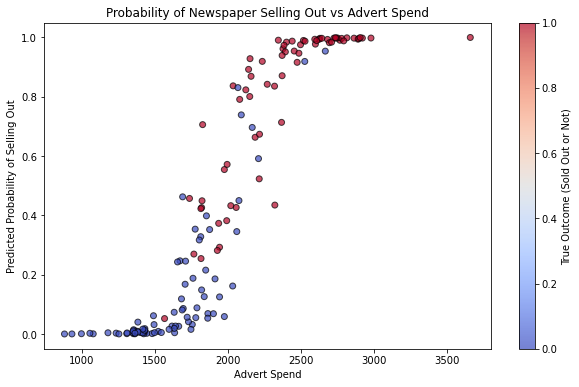

In [14]:
'''
In addition, the below visualisation highlights areas where ambiguity and uncertainty can mostly be found,
providing a visual representation that indicates where errors may occur when predicting with the model
'''

# Calculate probability of newspaper selling out and capture advert spend feature
predictions_proba = sales_classifier_model.predict_proba(test_X)[::,1]
advert_spend = test_X['Advert Spend']

# Visualise the probability of newspaper selling out (as per prediction) vs Advert Spend and true outcome
plt.figure(figsize=(10, 6))
scatter = plt.scatter(advert_spend, predictions_proba, c=test_y, cmap='coolwarm', edgecolor='k', alpha=0.7)
plt.colorbar(scatter, label='True Outcome (Sold Out or Not)')
plt.xlabel('Advert Spend')
plt.ylabel('Predicted Probability of Selling Out')
plt.title('Probability of Newspaper Selling Out vs Advert Spend')
plt.show()


<a id="model_1_qa"></a>
### Quality Metrics

Below there's a summary of the main quality metrics focused on this report.<br><br>
<b>Accuracy</b> measures how often a model correctly predicts the outcome, whether positive or negative.
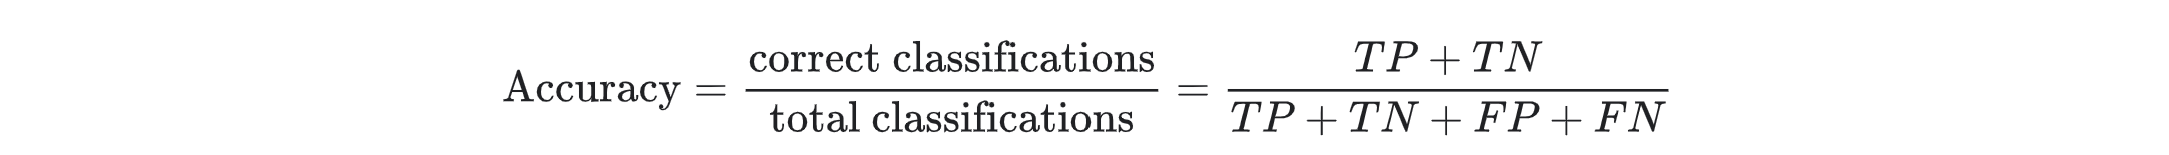<br>
<b>Precision</b> is the proportion of positive predictions that are actually positive.
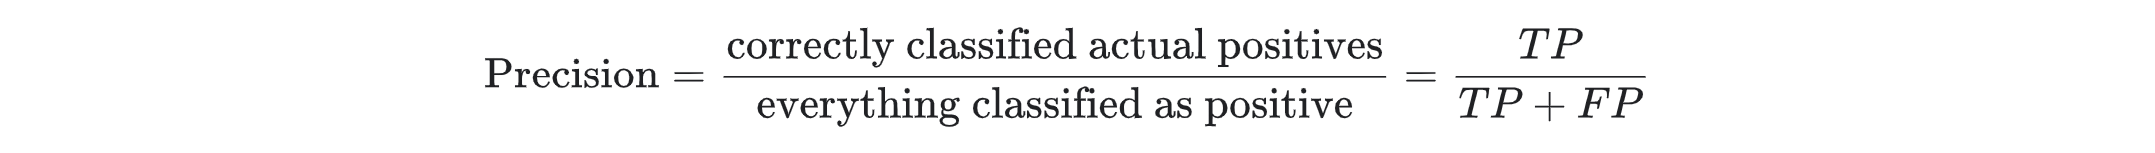<br>
<b>Recall</b> is the True Positive Rate (TPR) and indicates ratio of actual positives that were classified correctly.
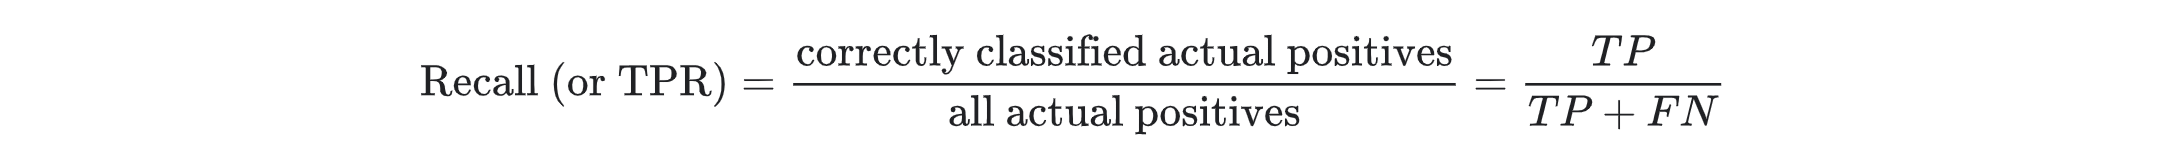<br>
<b>F1 Score</b> is the harmonic mean of Precision and Recall.<br>
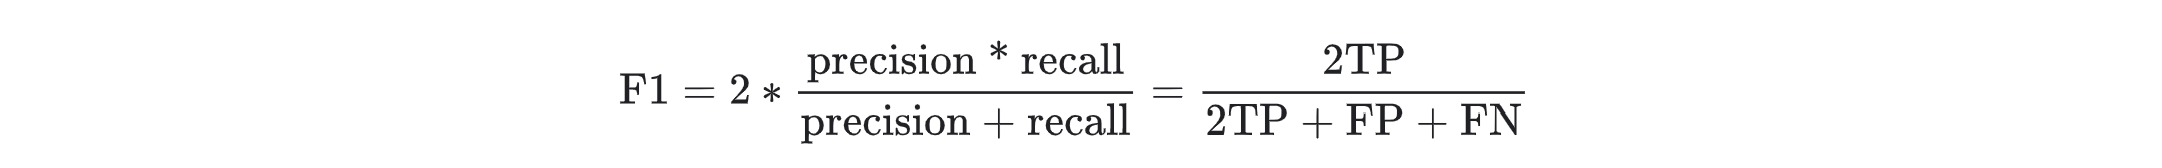
<b>Area Under Curve (AUC)</b> measures how well a model can distinguish between the categorisation classes. An AUC of 0.5 (50%) is no better than a random guess.

In [15]:
# Model quality metrics including Accuracy, Precision, Recall and F1 Score
target_names = ['Not Sold Out', 'Sold Out']
print(classification_report(test_y, sold_out_predictions, target_names=target_names))

              precision    recall  f1-score   support

Not Sold Out       0.84      0.93      0.88        80
    Sold Out       0.90      0.80      0.85        69

    accuracy                           0.87       149
   macro avg       0.87      0.86      0.86       149
weighted avg       0.87      0.87      0.86       149



Based on above metrics, we have a model accuracy of 87%, which is a decent performance, however indicates there's room for improvement in the model.<br>
It's important to notice that the model presents a weakness in it's recall rate (how often a model correctly identifies positive instances) for Sold Out scenarios, at 80%. In comparison, the model presents a recall rate of 93% for Not Sold Out scenarios.<br>
As mentioned previously, this first model was fitted with imbalanced data in order to explore the impact of imbalances to the quality metric Accuracy and to the AUC metric, which is shown by the ROC Curve below. The second model explored in this report is then fitted with balanced data and trained by following the same process as before to compare results.

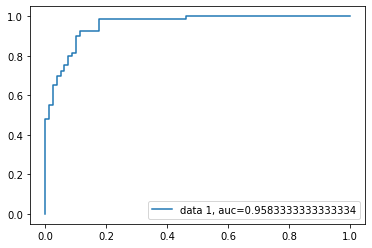

In [16]:
# Quality Measure: ROC (Receiver Operating Characteristi) Curve
fpr, tpr, _ = roc_curve(test_y,  predictions_proba) # False Positive Rate, True Positive Rate
auc = roc_auc_score(test_y, predictions_proba) # Area Under Curve
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

An AUC of 1 represents a test with perfect discrimination, therefore the presented result of auc=0.958 demostrates the model has a high probability (96%) of distinguishing between the two classes.

<a id="model_2"></a>

## Model 2 - Logistic Regression with Balanced Data

<a id="model_2_oversampling"></a>
### Data Balancing - Oversampling

Text(0.5, 1.0, 'Feature "SoldOut" Distribution')

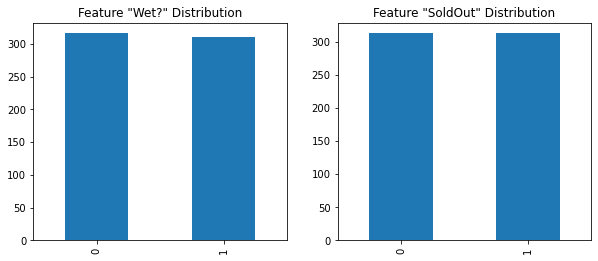

In [17]:
# Using Oversampling, balance the target data
# First Oversampling the Wet? feature
minority_class = df[df['Wet?']==1]
majority_class = df[df['Wet?']==0]
minority_upsampled = resample(minority_class, replace=True, n_samples=len(majority_class))
df_balanced = pd.concat([majority_class, minority_upsampled])

# The Oversampling of the SoldOut feature
minority_class = df_balanced[df_balanced['SoldOut']==1]
majority_class = df_balanced[df_balanced['SoldOut']==0]
minority_upsampled = resample(minority_class, replace=True, n_samples=len(majority_class))
df_balanced = pd.concat([majority_class, minority_upsampled])

fig, axes = plt.subplots(1, 2, figsize=(10,4))
df_balanced['Wet?'].value_counts().plot(ax=axes[0], kind='bar')
axes[0].set_title('Feature "Wet?" Distribution')
df_balanced['SoldOut'].value_counts().plot(ax=axes[1], kind='bar')
axes[1].set_title('Feature "SoldOut" Distribution')

<a id="model_2_fit"></a>
### Model Definition, Fitting and Predictions

In [18]:
# Define X and y, separate train and test datasets, and train the model with the now balanced data

# Definition of new X and y
X = df_balanced.drop(columns=[target_feature])
y = df_balanced[target_feature]

# Separation of train and test data
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.4, random_state=42)

# Fitting the model and predicting on test data
sales_classifier_model = LogisticRegression()
sales_classifier_model.fit(train_X, train_y)
sold_out_predictions = sales_classifier_model.predict(test_X)

<a id="model_2_confMat"></a>
### Confusion Matrix

Text(0.5, 257.44, 'Predicted label')

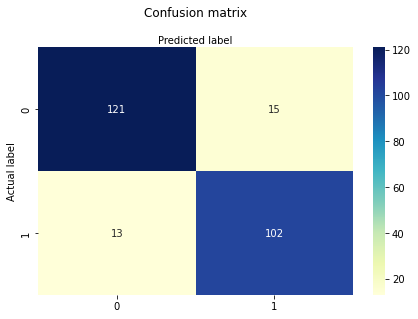

In [19]:
# Generate the confusion matrix for the model trained with balanced data

# Calculate the confusion matrixes for the predictions
predictions_matrix = confusion_matrix(test_y,sold_out_predictions)

# Visualisation of the confusion matrixes
class_names=['Negative','Positive']
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(predictions_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

<a id="model_2_qa"></a>
### Quality Metrics

In [20]:
# Model quality metrics including Accuracy, Precision, Recall and F1 Score
target_names = ['Not Sold Out', 'Sold Out']
print(classification_report(test_y, sold_out_predictions, target_names=target_names))

              precision    recall  f1-score   support

Not Sold Out       0.90      0.89      0.90       136
    Sold Out       0.87      0.89      0.88       115

    accuracy                           0.89       251
   macro avg       0.89      0.89      0.89       251
weighted avg       0.89      0.89      0.89       251



Compared to the quality metrics retrieved from the previous model (model 1 - trained with imbalanced data), it's possible to notice a few differences:
- Precision for Not Sold Out cases presented an increase (from 0.84 to 0.90), while precision for sold out cases presented a decrease (from 0.90 to 0.87).
- Recall presented a decrease for Not Sold Out cases (from 0.93 to 0.89), while presented an increase for Sold Out cases (from 0.80 to 0.89).
- F1 Score presented an increase for both Not Sold Out cases (from 0.88 to 0.90) amd Sold Out cases (from 0.85 to 0.88).
- Accuracy presented an increase from 0.87 to 0.89.

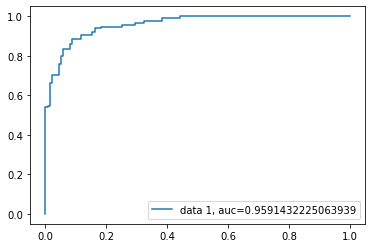

In [21]:
# Quality Measure: ROC (Receiver Operating Characteristi) Curve
predictions_proba = sales_classifier_model.predict_proba(test_X)[::,1]
fpr, tpr, _ = roc_curve(test_y,  predictions_proba) # False Positive Rate, True Positive Rate
auc = roc_auc_score(test_y, predictions_proba) # Area Under Curve
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

In comparison, the AUC has remained stable, having previously achieved 0.958 on model 1 and now resulting in 0.959 on model 2. This occurance demonstrates that the model's ability to separate positive and negative classes was already good before the application of oversampling for data balance.